In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#create a set of random latitude and longitude variables

lats=np.random.uniform(-90.000,90.000, size = 1500)
lngs=np.random.uniform(-180.000,180.000, size = 1500)

lat_lngs = zip(lats,lngs)

lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
#use the print function to display the latitude and longitude combinations.

for coordinate in coordinates:
    print(coordinate[0],coordinate[1])

-81.60603797616427 144.77333673721637
67.09437836071055 43.34228978302167
53.100425919410924 79.28990543109416
9.54669420916288 117.22094091598245
52.93938456925281 66.58156020609749
-59.87808425166851 -13.6079831824282
88.39354715297446 111.62933452880083
79.42549000565879 -140.02395630438977
11.735269236973181 -78.58173484717176
-72.20875749568276 122.8672202555436
41.701880629941115 111.0826357461313
55.67095857812063 -33.89598182708539
68.41468800542498 89.1376888889123
-5.360463403692762 -0.4485136499409066
-83.80193714028789 50.14826754448413
-58.258562996924645 -138.69233314268033
30.75864899373154 -174.79219988905217
34.92992250450665 151.54583814025494
-51.02764348503579 -148.80399886125684
-22.72097690623835 -137.43072044223956
-10.994310361253753 1.7181800124959636
-28.07882007525408 47.59335602635289
-40.632004332652535 -108.42537925635877
68.20417099573544 -58.198419146716745
62.80935645964004 144.53448442908518
34.08151792627734 -132.63332512496714
-32.894907905293415 163

In [5]:
#import citipy
from citipy import citipy

In [6]:
#create an open list to hold cities

cities=[]

#identify the nearest city for each lat and long combo.

for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if the city is unique add it to the cities list.
    if city not in cities:
        cities.append(city)

#print the city count to confirm sufficient count.

len(cities)                            

611

In [7]:
#import the requests library
import requests

#import the api key
from config import weather_api_key

In [26]:
#create a variable that will hold the url and api key
url="https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&units=imperial&appid=" + weather_api_key

In [27]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [ ]:
#create and empty list to hold weather data.

city_data=[]

#print the beginning of the logging.
print("Beginning data retrieval     ")
print("-----------------------------")

#create counters

record_count=1

set_count=1

#loop through the cities in our list.

for i, city in enumerate(cities):
    
    #group cities in sets of 50 for logging purposes.
    
    if(i % 50==0 and i>=50):
        
        set_count+=1
        
        record_count=1
        
        time.sleep(60)
    
    #create endpoint URL with each city.
    city_url= url + '&q=' + city.replace(" ","+")
    
    #log the url, record, and set numbers and the city.
    print(f"Processing record {record_count} of Set {set_count} | {city}")
    
    #add 1 to the record count
    
    record_count += 1

#run an API request for each of the cities.

    try:
        #parse the JSON file to retrieve the weather
        
        city_weather= requests.get(city_url).json()
        
        #parse the needed data
        city_lat = city_weather["coord"]["lat"]
        
        city_lng = city_weather["coord"]["lon"]
       
        city_max_temp = city_weather["main"]["temp_max"]
        
        city_humidity = city_weather["main"]["humidity"]
        
        city_clouds = city_weather["clouds"]["all"]
        
        city_wind = city_weather["wind"]["speed"]
        
        city_country = city_weather["sys"]["country"]
        
        #convert the date to ISO standard
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        #append the city information into the city_data list.
        
        city_data.append({"City":city.title(), 
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date,})

#if an error is experienced, skip the city
    except:print("City not found. Skipping...")
    pass

#indicate that Data loading is complete

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning data retrieval     
-----------------------------
Processing record 1 of Set 1 | fortuna
Processing record 2 of Set 1 | manaure
Processing record 3 of Set 1 | umm lajj
Processing record 4 of Set 1 | port lincoln
Processing record 5 of Set 1 | chapais
Processing record 6 of Set 1 | hobart
Processing record 7 of Set 1 | busselton
Processing record 8 of Set 1 | barentsburg
City not found. Skipping...
Processing record 9 of Set 1 | san patricio
Processing record 10 of Set 1 | chuy
Processing record 11 of Set 1 | torbay
Processing record 12 of Set 1 | hermanus
Processing record 13 of Set 1 | jawar
Processing record 14 of Set 1 | elizabeth city
Processing record 15 of Set 1 | jamestown
Processing record 16 of Set 1 | nanortalik
Processing record 17 of Set 1 | kavieng
Processing record 18 of Set 1 | mataura
Processing record 19 of Set 1 | gagnoa
Processing record 20 of Set 1 | nizhneyansk
City not found. Skipping...
Processing record 21 of Set 1 | atuona
Processing record 22 of Set 

In [29]:
len(city_data)

559

In [31]:
#convert the array of dictionaries to a pandas dataframe

city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Fortuna,40.5982,-124.1573,61.66,92,100,5.75,US,2022-08-14 15:58:38
1,Manaure,11.7751,-72.4445,86.85,61,86,8.81,CO,2022-08-14 15:58:38
2,Umm Lajj,25.0213,37.2685,87.57,62,99,9.53,SA,2022-08-14 15:58:39
3,Port Lincoln,-34.7333,135.8667,50.70,82,93,8.55,AU,2022-08-14 15:58:39
4,Chapais,49.7834,-74.8492,69.58,51,99,3.31,CA,2022-08-14 15:58:40
5,Hobart,-42.8794,147.3294,52.27,92,40,10.36,AU,2022-08-14 15:58:40
6,Busselton,-33.6500,115.3333,54.25,76,68,9.15,AU,2022-08-14 15:58:41
7,San Patricio,28.0170,-97.5169,79.84,88,100,12.08,US,2022-08-14 15:58:42
8,Chuy,-33.6971,-53.4616,66.78,69,6,10.98,UY,2022-08-14 15:58:42
9,Torbay,47.6666,-52.7314,71.17,90,100,9.22,CA,2022-08-14 15:58:43


In [32]:
#re-arrange the columns in the dataframe by creating a variable and then implementing in a dataframe.

new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']

city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Fortuna,US,2022-08-14 15:58:38,40.5982,-124.1573,61.66,92,100,5.75
1,Manaure,CO,2022-08-14 15:58:38,11.7751,-72.4445,86.85,61,86,8.81
2,Umm Lajj,SA,2022-08-14 15:58:39,25.0213,37.2685,87.57,62,99,9.53
3,Port Lincoln,AU,2022-08-14 15:58:39,-34.7333,135.8667,50.70,82,93,8.55
4,Chapais,CA,2022-08-14 15:58:40,49.7834,-74.8492,69.58,51,99,3.31
...,...,...,...,...,...,...,...,...,...
554,Sundumbili,ZA,2022-08-14 16:15:41,-29.1337,31.3975,62.89,56,13,9.51
555,Gap,FR,2022-08-14 16:15:42,44.6667,6.0000,56.84,75,77,3.56
556,Mizque,BO,2022-08-14 16:15:42,-17.9410,-65.3402,77.38,30,54,2.95
557,Marzuq,YE,2022-08-14 16:15:43,14.4000,46.4667,83.03,36,97,10.31


In [44]:
#create an output file to csv

output_data_file = "weather_data/cities.csv"

city_data_df.to_csv(output_data_file, index_label="City ID")

In [45]:
#extract relevant fields for new weather scatter chart.

lats = city_data_df["Lat"]

max_temps = city_data_df["Max Temp"]

humidity = city_data_df["Humidity"]

cloudiness = city_data_df["Cloudiness"]

wind_speed = city_data_df["Wind Speed"]

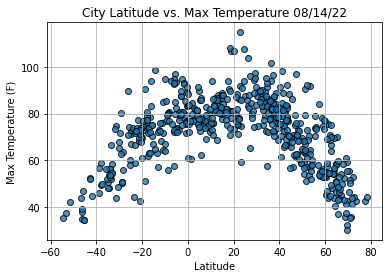

In [46]:
#import the time module

import time

#build the scatter plot for latitude vs. max temp.

plt.scatter(lats,
            max_temps,
            edgecolor="k", linewidth=1, marker='o',
            alpha=0.8,label = 'Cities')

#incorporate the other graph properties

plt.title (f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/fig1.png")

#show the plot

plt.show()

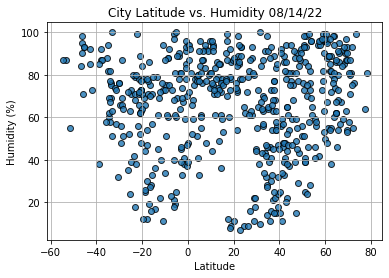

In [47]:
#build the scatter plot for latitude vs. humidity.

plt.scatter(lats,
            humidity,
            edgecolor="k", linewidth=1, marker='o',
            alpha=0.8,label = 'Cities')

#incorporate the other graph properties

plt.title (f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/fig2.png")

#show the plot

plt.show()

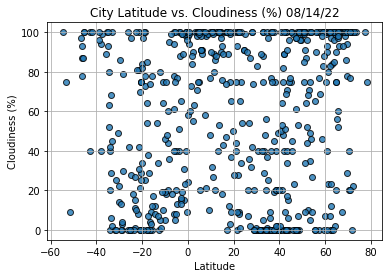

In [48]:
#build the scatter plot for latitude vs. cloudiness.

plt.scatter(lats,
            cloudiness,
            edgecolor="k", linewidth=1, marker='o',
            alpha=0.8,label = 'Cities')

#incorporate the other graph properties

plt.title (f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/fig3.png")

#show the plot

plt.show()

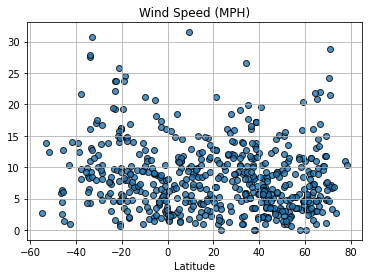

In [49]:
#build the scatter plot for latitude vs. wind speed.

plt.scatter(lats,
            wind_speed,
            edgecolor="k", linewidth=1, marker='o',
            alpha=0.8,label = 'Cities')

#incorporate the other graph properties

plt.title (f"Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/fig4.png")

#show the plot

plt.show()

In [74]:
#create a function to create a perform linear regression on multiple variables in the weather data.
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

def plot_linear_regression(x_values,y_values,title, y_label, text_coordinates):
      # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
   
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
   
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    

In [75]:
# Create Northern and Southern Hemisphere DataFrames.

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

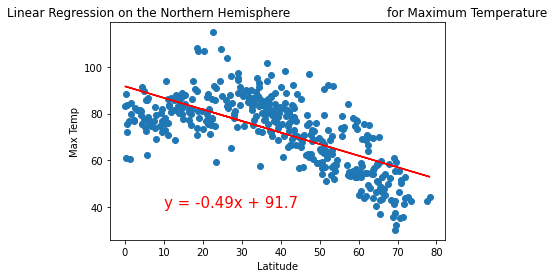

In [76]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

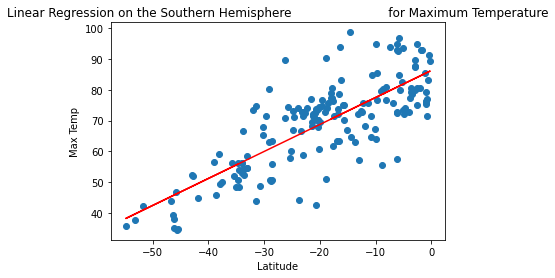

In [82]:
# Linear regression on the southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


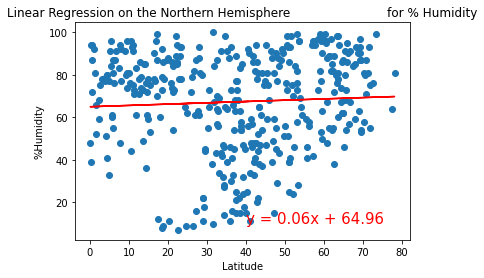

In [68]:
# Linear regression on the northern Hemisphere humidity

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '%Humidity',(40,10))

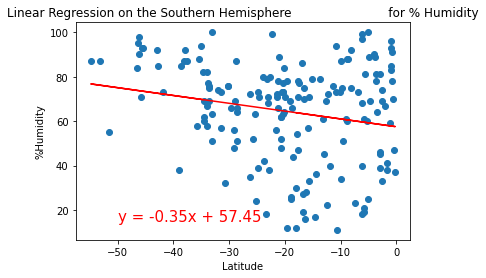

In [69]:
# Linear regression on the southern Hemisphere humidity

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '%Humidity',(-50,15))

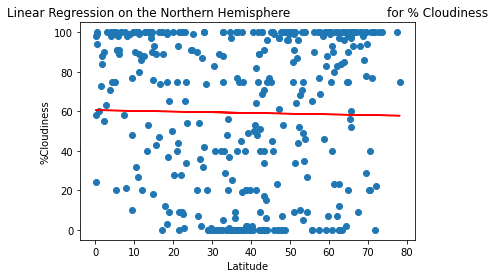

In [72]:
# Linear regression on the northern Hemisphere cloudiness

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '%Cloudiness',(-50,15))


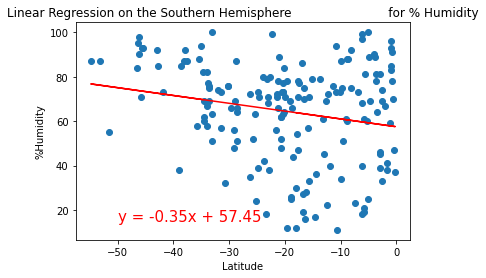

In [83]:
# Linear regression on the southern Hemisphere humidity

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '%Humidity',(-50,15))

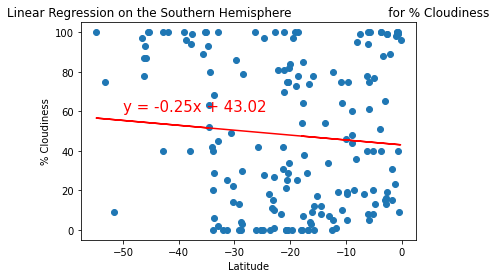

In [86]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

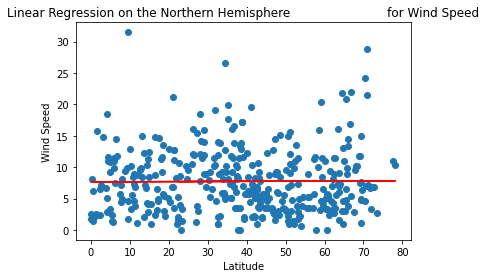

In [87]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

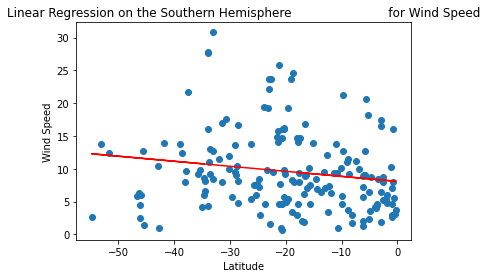

In [88]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))